# Laboratory session 5
***

**Author:** Rinaldi Luca 

### Exercise 1
***

#### 1.a)

I would assume a binomial distribution:

$$ P(y | p, n)= \binom{n}{y}p^y (1-p)^{n-y} $$

where:
* y = number of people that have seen the last issue of the journal
* n = total number of interviewed people
* p = probability that a person reads the last issue

#### 1.b) 

Knowing 
$$ Posterior \propto Likelihood \cdot Prior $$

Assuming uniform Prior, the Posterior distribution will be equal to the Likelihood scaled by a normalization factor

#### 1.c)


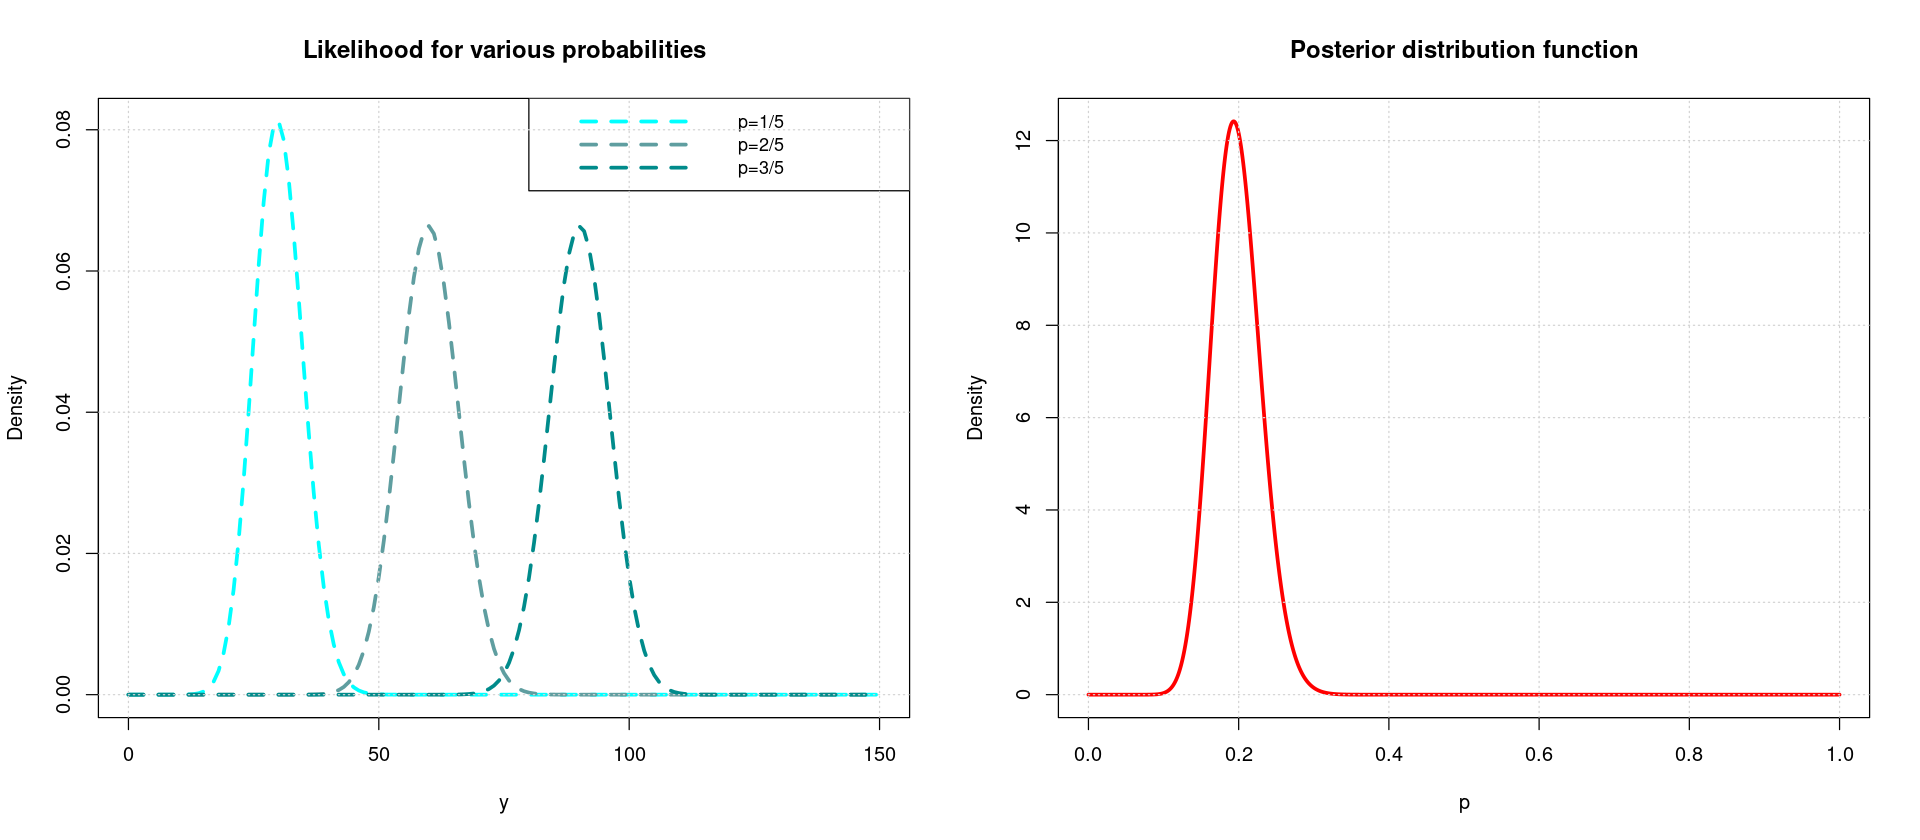

In [1]:
n <- 150
y <- 29

x  <- 0:150
dp <- 1/1000
p  <- seq(from=0, to=1, by=dp)

#different likelihood
l1 <- dbinom(x=x, size=n, prob=1/5)
l2 <- dbinom(x=x, size=n, prob=2/5)
l3 <- dbinom(x=x, size=n, prob=3/5)

#posterior
j <- length(p)
post      <- dbinom(x=y, size=n, prob=p)
post_norm <- post / (dp*sum(post[1:j-1]+post[2:j])/2)

par(mfrow=c(1,2))
options(repr.plot.width=16, repr.plot.height=7)

plot(x, l1, type='l', lty=2, lwd=3, main='Likelihood for various probabilities',
     ylab='Density', xlab='y', col='cyan')
lines(x, l2, lty=2, lwd=3, col='cadetblue')
lines(x, l3, lty=2, lwd=3, col='darkcyan')
legend('topright', legend=c('p=1/5','p=2/5','p=3/5'), lty=2, lwd=3, col=c('cyan','cadetblue','darkcyan'),
      cex=0.9)
grid()

plot(p, post_norm, type='l', lty=1, lwd=3, main='Posterior distribution function',
     ylab='Density', xlab='p', col='red')
grid()

### Exercise 2
***

* Anna's prior: $ \beta(\alpha,\beta) $ given $\mu = 0.2$ and $\sqrt{var}=0.08$
$$ \alpha = \biggl( \frac{\mu (1- \mu)}{var} -1 \biggr) \mu \\
   \beta = \biggl( \frac{\mu (1- \mu)}{var} -1 \biggr) (1- \mu)$$
* Benny's prior: $ U(0,1) $
* Chris' prior: trapezoidal shape like
$$ f(X)= \cases {\hfill 20x \hfill\hspace{1.2cm} 0 \leq x<0.1 \\
                \hfill 2 \hfill\hspace{1.2cm}    0.1 \leq x <0.3 \\
                \hfill 5-10x \hfill \hspace{0.5cm} 0.3 \leq x< 0.5 \\
                \hfill 0  \hfill \hspace{2.45cm} x>0.5} $$

#### 2.a)


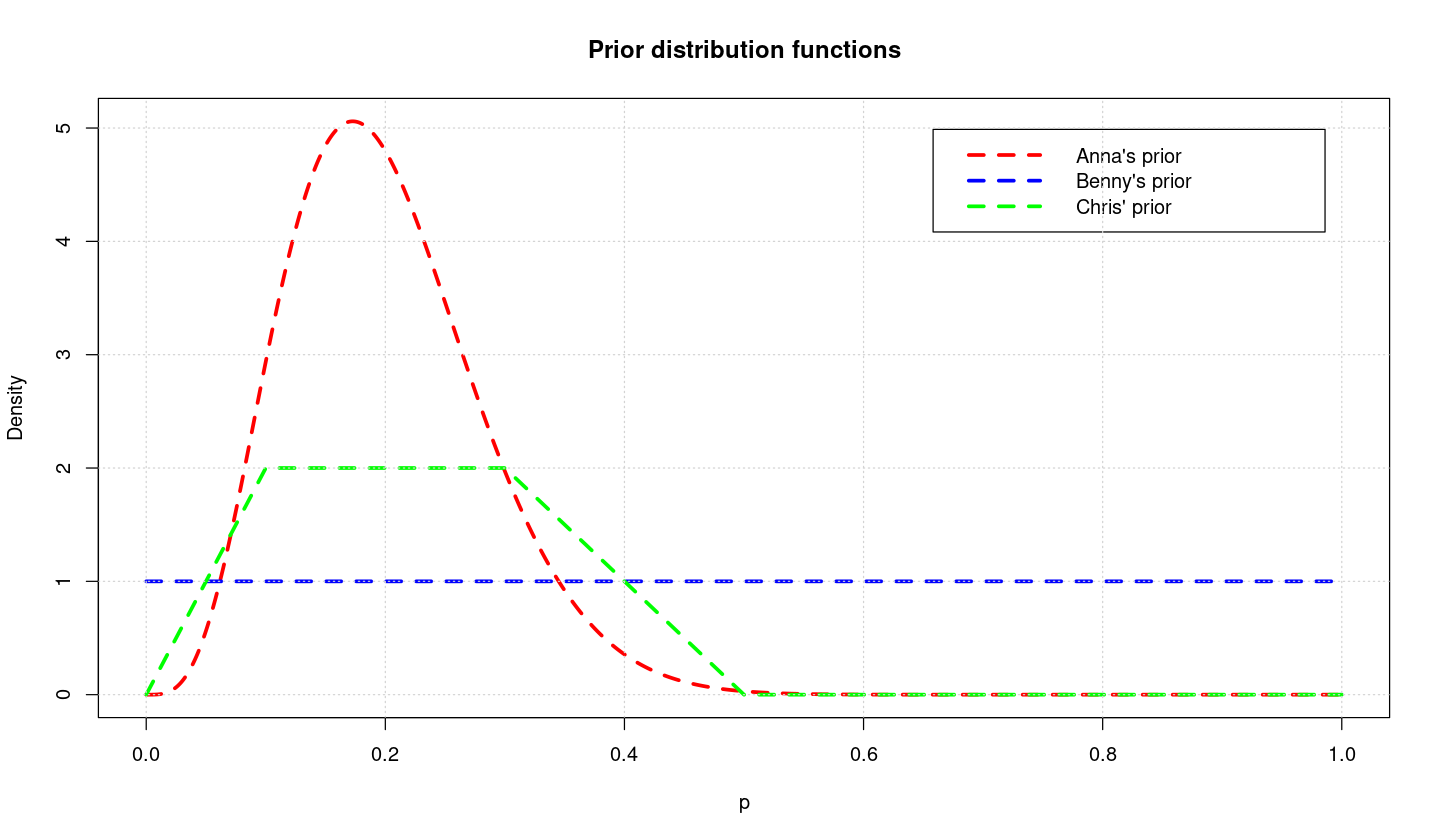

In [2]:
mu  <- 0.2
var <- 0.08^2
a   <- (mu*(1-mu)/var -1) * mu
b   <- (mu*(1-mu)/var -1) * (1- mu)
dp  <- 1/1000
p   <- seq(from=0, to=1, by=dp)
trapez <- Vectorize(function(x){
                    if(0 <= x & x< 0.1){return(20*x)}
                    if(0.1 <= x & x< 0.3){return(2)}
                    if(0.3 <= x & x< 0.5){return(5-10*x)}
                    if(x >= 0.5){return(0)}
})

anna_prior  <- dbeta(x=p, shape1=a, shape2=b)
benny_prior <- dunif(x=p)
chris_prior <- trapez(p)

options(repr.plot.width=12, repr.plot.height=7)
plot(p, anna_prior, type='l', lty=2, lwd=3, main='Prior distribution functions',
     ylab='Density', xlab='p', col='red')
lines(p, benny_prior, lty=2, lwd=3, col='blue')
lines(p, chris_prior, lty=2, lwd=3, col='green')
legend('topright', legend=c('Anna\'s prior','Benny\'s prior','Chris\' prior'), 
       lty=2, lwd=3, col=c('red','blue','green'), inset=0.05)
grid()

#### 2.b)

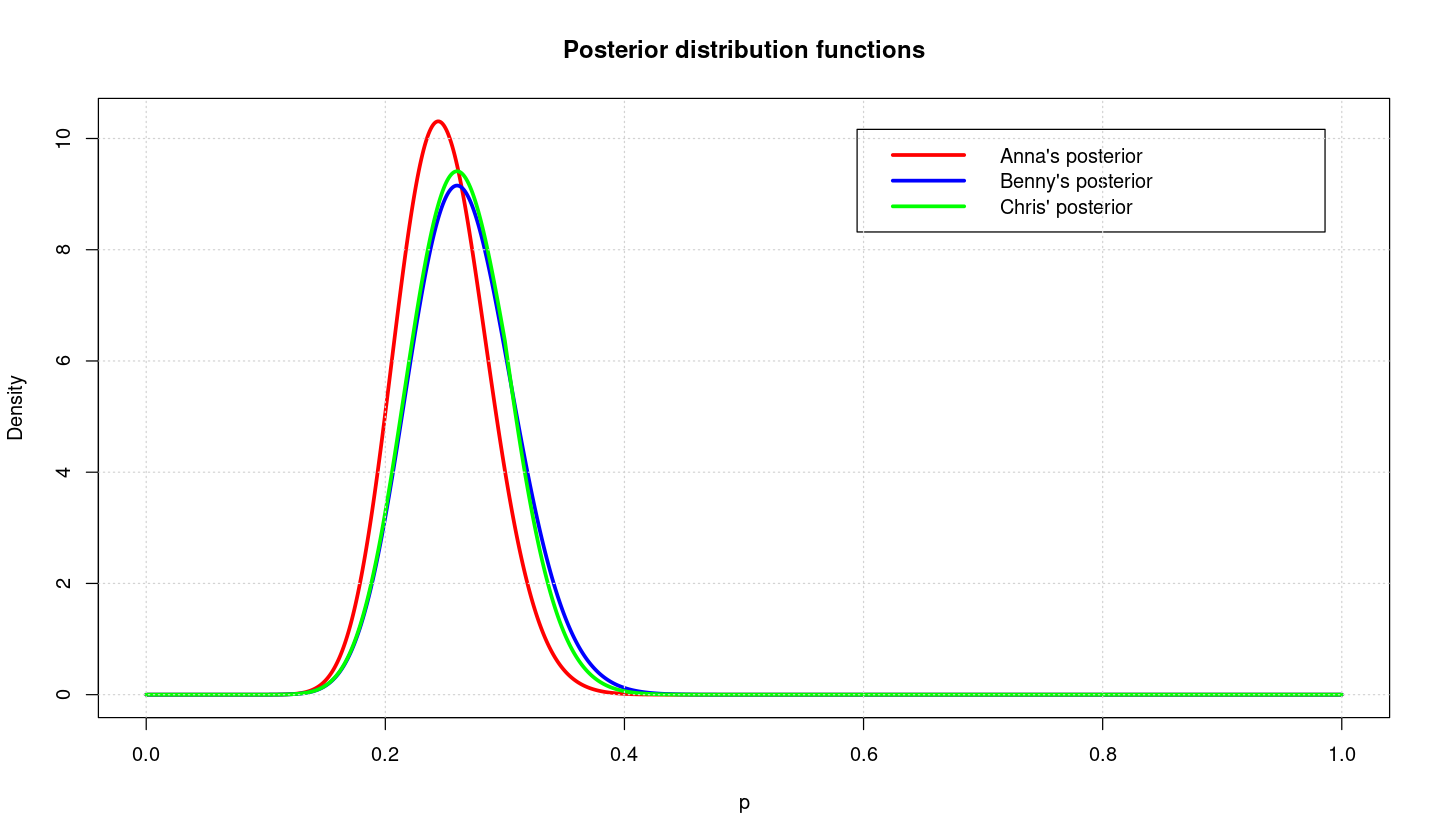

In [3]:
n <- 100
y <- 26
j <- length(p)

anna_post  <- dbinom(x=y, size=n, prob=p) * anna_prior
benny_post <- dbinom(x=y, size=n, prob=p) * benny_prior
chris_post <- dbinom(x=y, size=n, prob=p) * chris_prior

anna_post_n   <- anna_post / (dp*sum(anna_post[1:j-1]+anna_post[2:j])/2)
benny_post_n  <- benny_post / (dp*sum(benny_post[1:j-1]+benny_post[2:j])/2)
chris_post_n  <- chris_post / (dp*sum(chris_post[1:j-1]+chris_post[2:j])/2)

options(repr.plot.width=12, repr.plot.height=7)
plot(p, anna_post_n, type='l', lty=1, lwd=3, main='Posterior distribution functions',
     ylab='Density', xlab='p', col='red')
lines(p, benny_post_n, lty=1, lwd=3, col='blue')
lines(p, chris_post_n, lty=1, lwd=3, col='green')
legend('topright', legend=c('Anna\'s posterior','Benny\'s posterior','Chris\' posterior'), 
       lty=1, lwd=3, col=c('red','blue','green'), inset=0.05)
grid()

#### 2.c)

Anna's posterior:  -most probable value p=0.244
                   -95% credibility interval between p1=0.176 and p2=0.328
Benny's posterior: -most probable value p=0.26
                   -95% credibility interval between p1=0.183 and p2=0.354
Chris' posterior:  -most probable value p=0.26
                   -95% credibility interval between p1=0.183 and p2=0.346

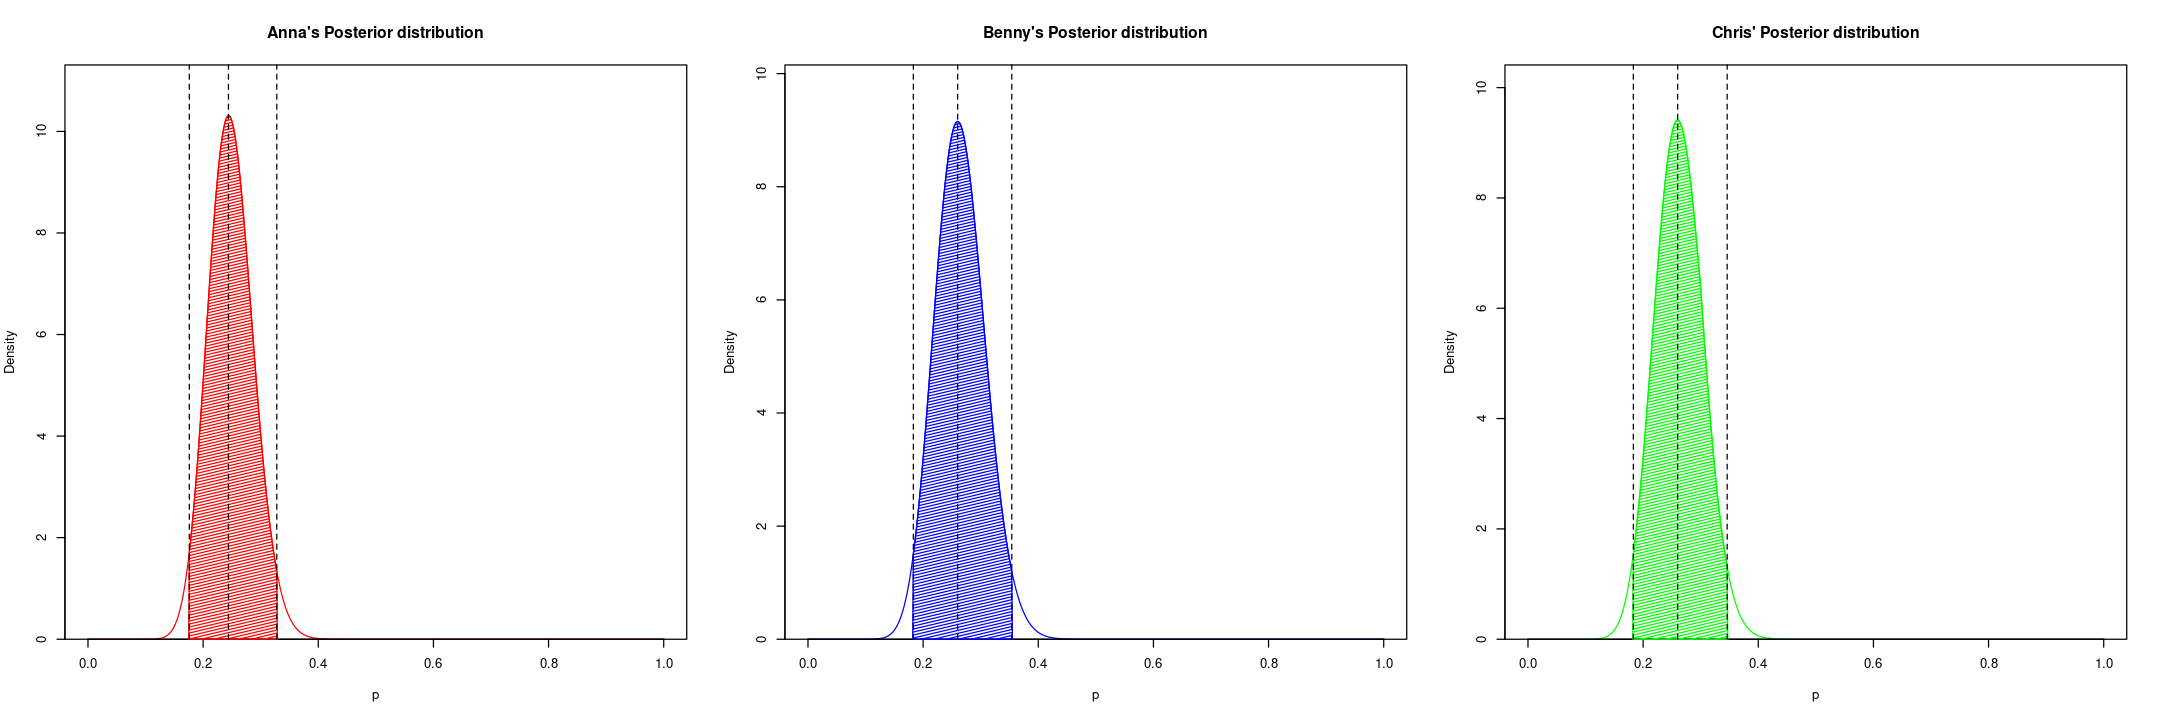

In [4]:
anna_mp  <- p[which.max(anna_post_n)]
benny_mp <- p[which.max(benny_post_n)]
chris_mp <- p[which.max(chris_post_n)]

credibility <- function(x, perc){
                cdf <- cumsum(x)
                for (i in 2:length(x)){
                    if ((1-perc)/2 >= cdf[i-1] & (1-perc)/2 < cdf[i]){x1 <- i-1}
                    if ((1+perc)/2 > cdf[i-1] & (1+perc)/2 <= cdf[i]){x2 <- i}
                }
                return(c(x1,x2))
}

anna_ix  <- credibility(anna_post_n*dp,0.95)
benny_ix <- credibility(benny_post_n*dp,0.95)
chris_ix <- credibility(chris_post_n*dp,0.95)

cat('Anna\'s posterior:  -most probable value p=',anna_mp,sep='')
cat('\n                   -95% credibility interval between p1=',p[anna_ix[1]],' and p2=',p[anna_ix[2]],sep='')
cat('\nBenny\'s posterior: -most probable value p=',benny_mp,sep='')
cat('\n                   -95% credibility interval between p1=',p[benny_ix[1]],' and p2=',p[benny_ix[2]],sep='')
cat('\nChris\' posterior:  -most probable value p=',chris_mp,sep='')
cat('\n                   -95% credibility interval between p1=',p[chris_ix[1]],' and p2=',p[chris_ix[2]],sep='')

par(mfrow=c(1,3))
options(repr.plot.width=18, repr.plot.height=6)
plot(p, anna_post_n, type='l', lty=1, lwd=1, main='Anna\'s Posterior distribution',
     ylab='Density', xlab='p', col='red', ylim=c(0,max(anna_post_n)+1), yaxs='i')
polygon(x = p[(anna_ix[1]-1):(anna_ix[2]+1)], y = c(0,anna_post_n[anna_ix[1]:anna_ix[2]],0), 
        col='red', density=50 )
abline(v=anna_mp, lty=2,col='black')
abline(v=p[anna_ix[1]], lty=2,col='black')
abline(v=p[anna_ix[2]], lty=2,col='black')

plot(p, benny_post_n, type='l', lty=1, lwd=1, main='Benny\'s Posterior distribution',
     ylab='Density', xlab='p', col='blue', ylim=c(0,max(benny_post_n)+1), yaxs='i')
polygon(x = p[(benny_ix[1]-1):(benny_ix[2]+1)], y = c(0,benny_post_n[benny_ix[1]:benny_ix[2]],0), 
        col='blue', density=50 )
abline(v=benny_mp, lty=2,col='black')
abline(v=p[benny_ix[1]], lty=2,col='black')
abline(v=p[benny_ix[2]], lty=2,col='black')

plot(p, chris_post_n, type='l', lty=1, lwd=1, main='Chris\' Posterior distribution',
     ylab='Density', xlab='p', col='green', ylim=c(0,max(chris_post_n)+1), yaxs='i')
polygon(x = p[(chris_ix[1]-1):(chris_ix[2]+1)], y = c(0,chris_post_n[chris_ix[1]:chris_ix[2]],0), 
        col='green', density=50 )
abline(v=chris_mp, lty=2,col='black')
abline(v=p[chris_ix[1]], lty=2,col='black')
abline(v=p[chris_ix[2]], lty=2,col='black')

### Exercise 3

#### 3.a)

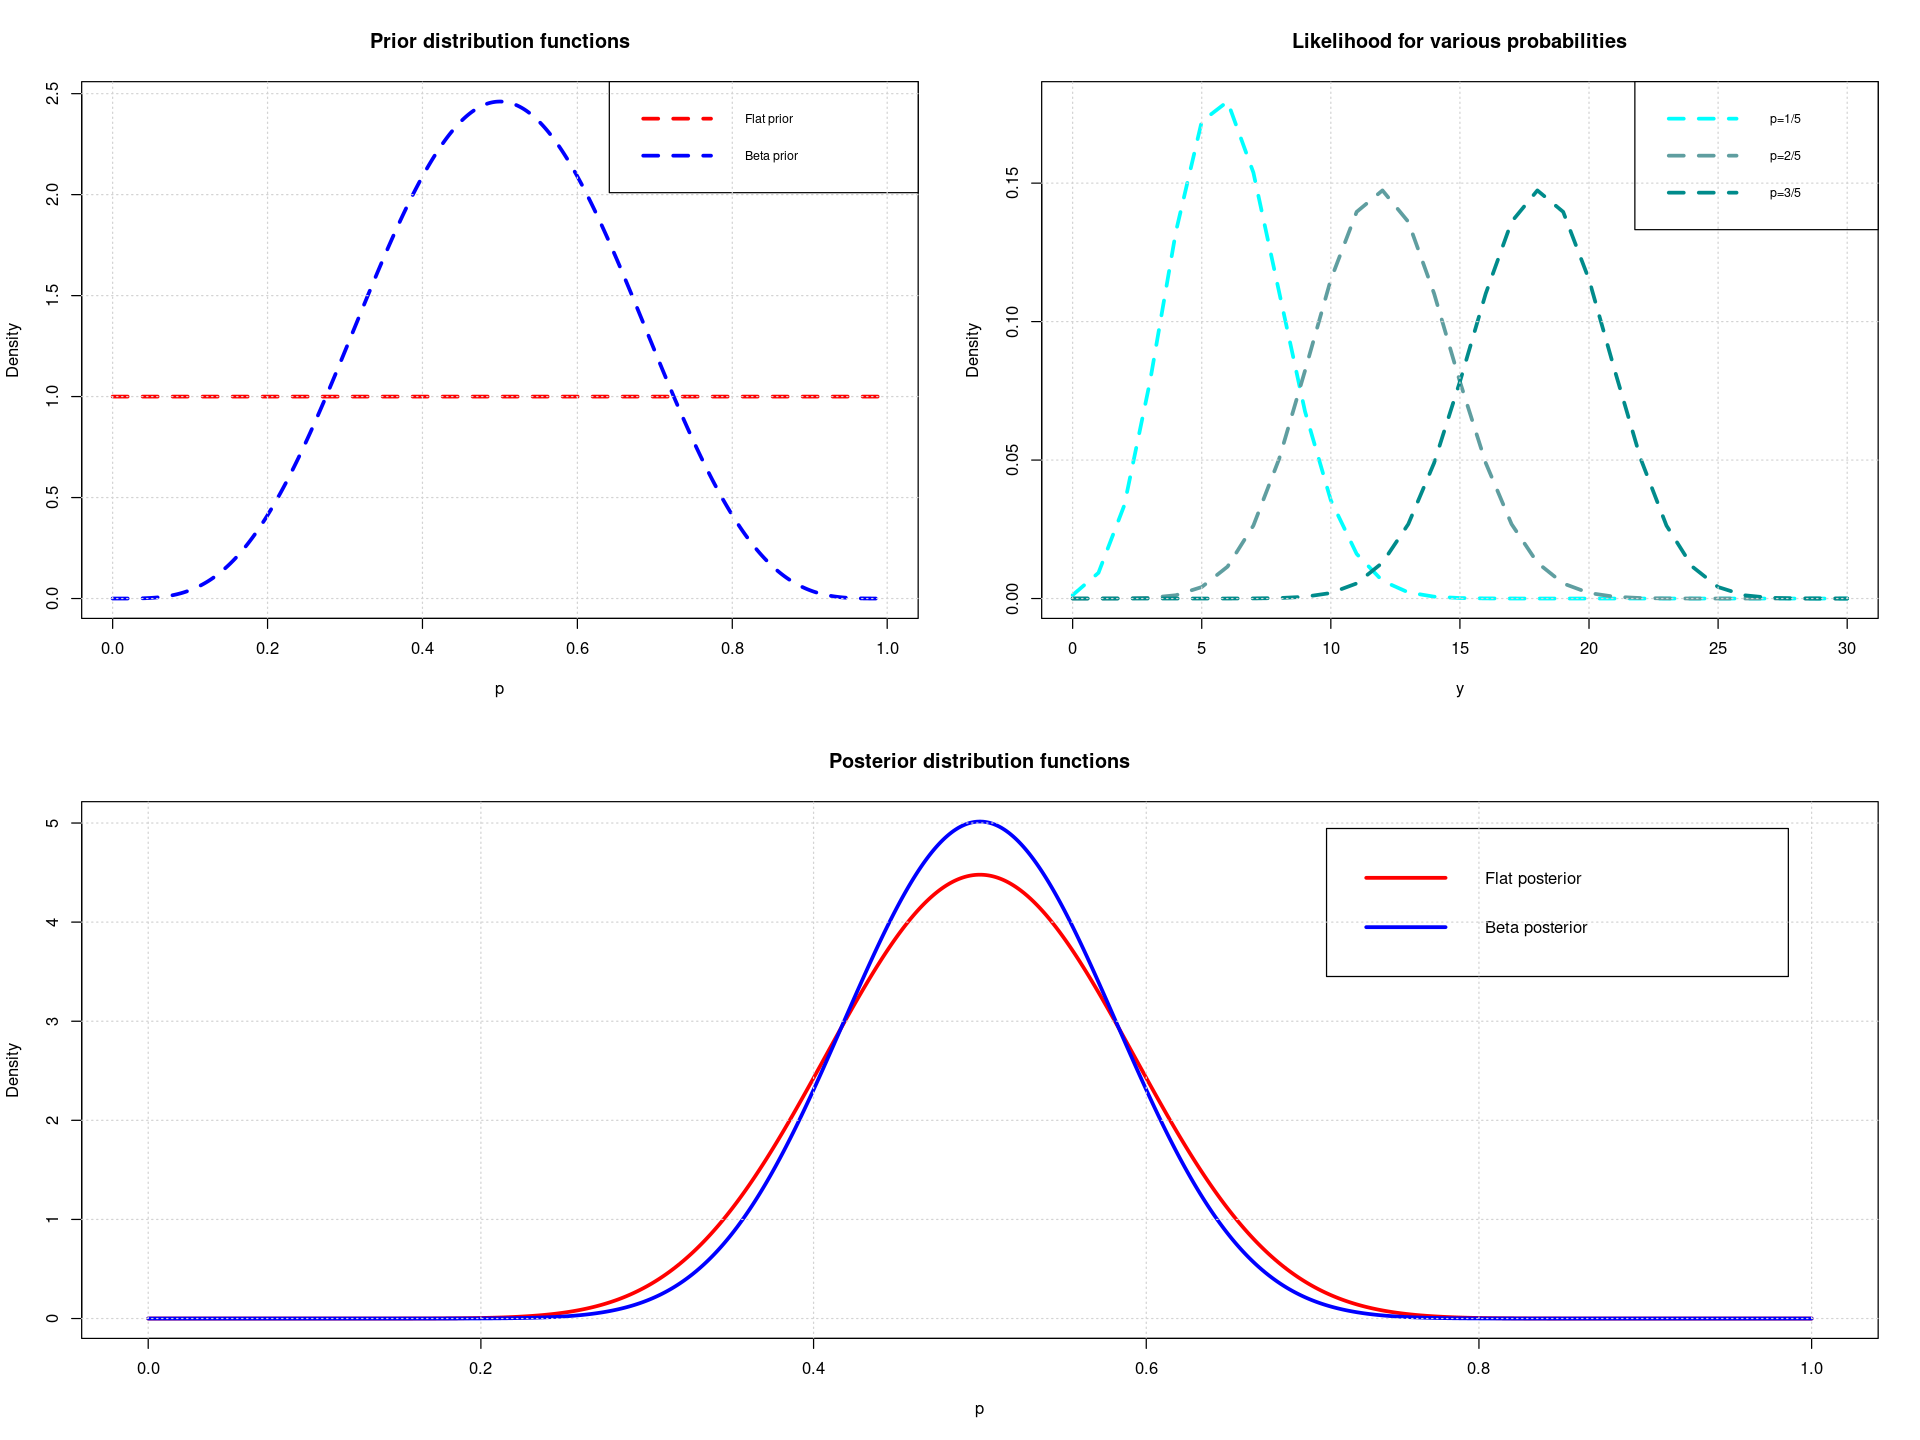

In [5]:
out <- c('T','T','T','T','T','H','T','T','H','H',
         'T','T','H','H','H','T','H','T','H','T',
         'H','H','T','H','T','H','T','H','H','H')
n <- length(out)
y <- length(out[which(out=='H')])
x <- 0:n
dp <- 1/1000
p  <- seq(0,1,dp)
j  <- length(p)

#priors
flat_prior <- dunif(p)
beta_prior <- dbeta(p,5,5)

#different likelihood
l1 <- dbinom(x=x, size=n, prob=1/5)
l2 <- dbinom(x=x, size=n, prob=2/5)
l3 <- dbinom(x=x, size=n, prob=3/5)

#posteriors
flat_post <- dbinom(x=y, size=n, prob=p) * flat_prior
beta_post <- dbinom(x=y, size=n, prob=p) * beta_prior

flat_post_n <- flat_post / (dp*sum(flat_post[2:j]+flat_post[1:j-1])/2)
beta_post_n <- beta_post / (dp*sum(beta_post[2:j]+beta_post[1:j-1])/2)

options(repr.plot.width=16, repr.plot.height=12)
m <- rbind(c(1,2), c(3,3))
layout(m)
#par(mar=c(3,3,0,0))

plot(p, flat_prior, type='l', lty=2, lwd=3, main='Prior distribution functions',
     ylab='Density', xlab='p', col='red', ylim=c(0,max(beta_prior)))
lines(p, beta_prior, lty=2, lwd=3, col='blue')
legend('topright', legend=c('Flat prior','Beta prior'), 
       lty=2, lwd=3, col=c('red','blue'),cex=0.75)
grid()

plot(x, l1, type='l', lty=2, lwd=3, main='Likelihood for various probabilities',
     ylab='Density', xlab='y', col='cyan')
lines(x, l2, lty=2, lwd=3, col='cadetblue')
lines(x, l3, lty=2, lwd=3, col='darkcyan')
legend('topright', legend=c('p=1/5','p=2/5','p=3/5'), lty=2, lwd=3, col=c('cyan','cadetblue','darkcyan'),
      cex=0.75)
grid()

plot(p, flat_post_n, type='l', lty=1, lwd=3, main='Posterior distribution functions',
     ylab='Density', xlab='p', col='red', ylim=c(0,max(beta_post_n)))
lines(p, beta_post_n, lty=1, lwd=3, col='blue')
legend('topright', legend=c('Flat posterior','Beta posterior'), 
       lty=1, lwd=3, col=c('red','blue','green'), inset=0.05)
grid()

#### 3.b)

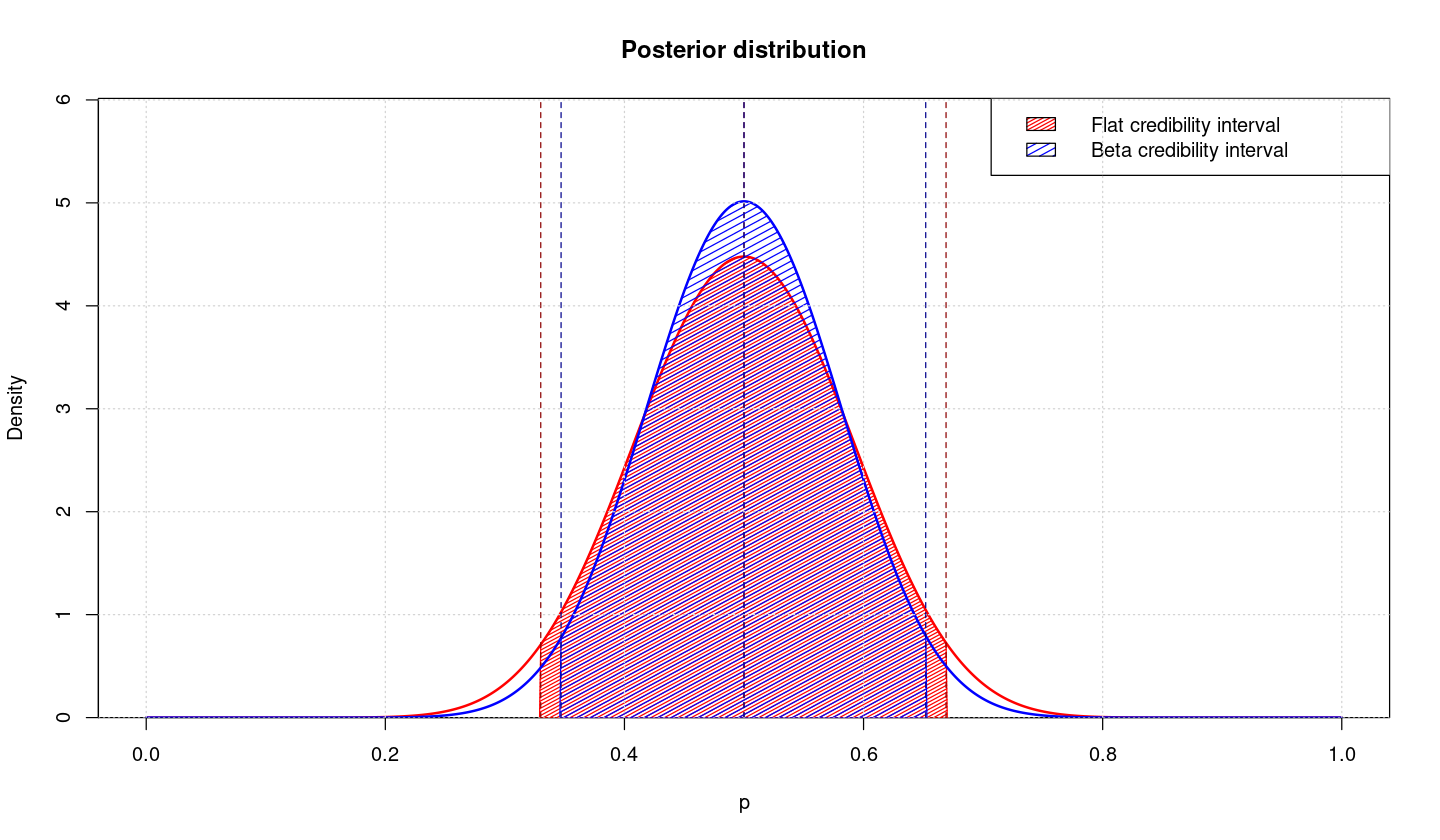

In [6]:
flat_mp <- p[which.max(flat_post_n)]
beta_mp <- p[which.max(beta_post_n)]

credibility <- function(x, perc){
                cdf <- cumsum(x)
                for (i in 2:length(x)){
                    if ((1-perc)/2 >= cdf[i-1] & (1-perc)/2 < cdf[i]){x1 <- i-1}
                    if ((1+perc)/2 > cdf[i-1] & (1+perc)/2 <= cdf[i]){x2 <- i}
                }
                return(c(x1,x2))
}

flat_ix <- credibility(flat_post_n*dp,0.95)
beta_ix <- credibility(beta_post_n*dp,0.95)

#par(mfrow=c(1,2))
options(repr.plot.width=12, repr.plot.height=7)
plot(p, flat_post_n, type='l', lty=1, lwd=2, main='Posterior distribution',
     ylab='Density', xlab='p', col='red', ylim=c(0,max(beta_post_n)+1), yaxs='i')
polygon(x = p[(flat_ix[1]-1):(flat_ix[2]+1)], y = c(0,flat_post_n[flat_ix[1]:flat_ix[2]],0), 
        col='red', density=50 )
abline(v=flat_mp, lty=2,col='darkred')
abline(v=p[flat_ix[1]], lty=2,col='darkred')
abline(v=p[flat_ix[2]], lty=2,col='darkred')

lines(p, beta_post_n, lty=1, lwd=2, col='blue')
polygon(x = p[(beta_ix[1]-1):(beta_ix[2]+1)], y = c(0,beta_post_n[beta_ix[1]:beta_ix[2]],0), 
        col='blue', density=25 )
abline(v=beta_mp, lty=2,col='darkblue')
abline(v=p[beta_ix[1]], lty=2,col='darkblue')
abline(v=p[beta_ix[2]], lty=2,col='darkblue')

legend('topright', legend=c('Flat credibility interval','Beta credibility interval'), 
        fill=c('red','blue'), inset=c(-0.1,0), density=c(50,25))
grid()

#### 3.c)

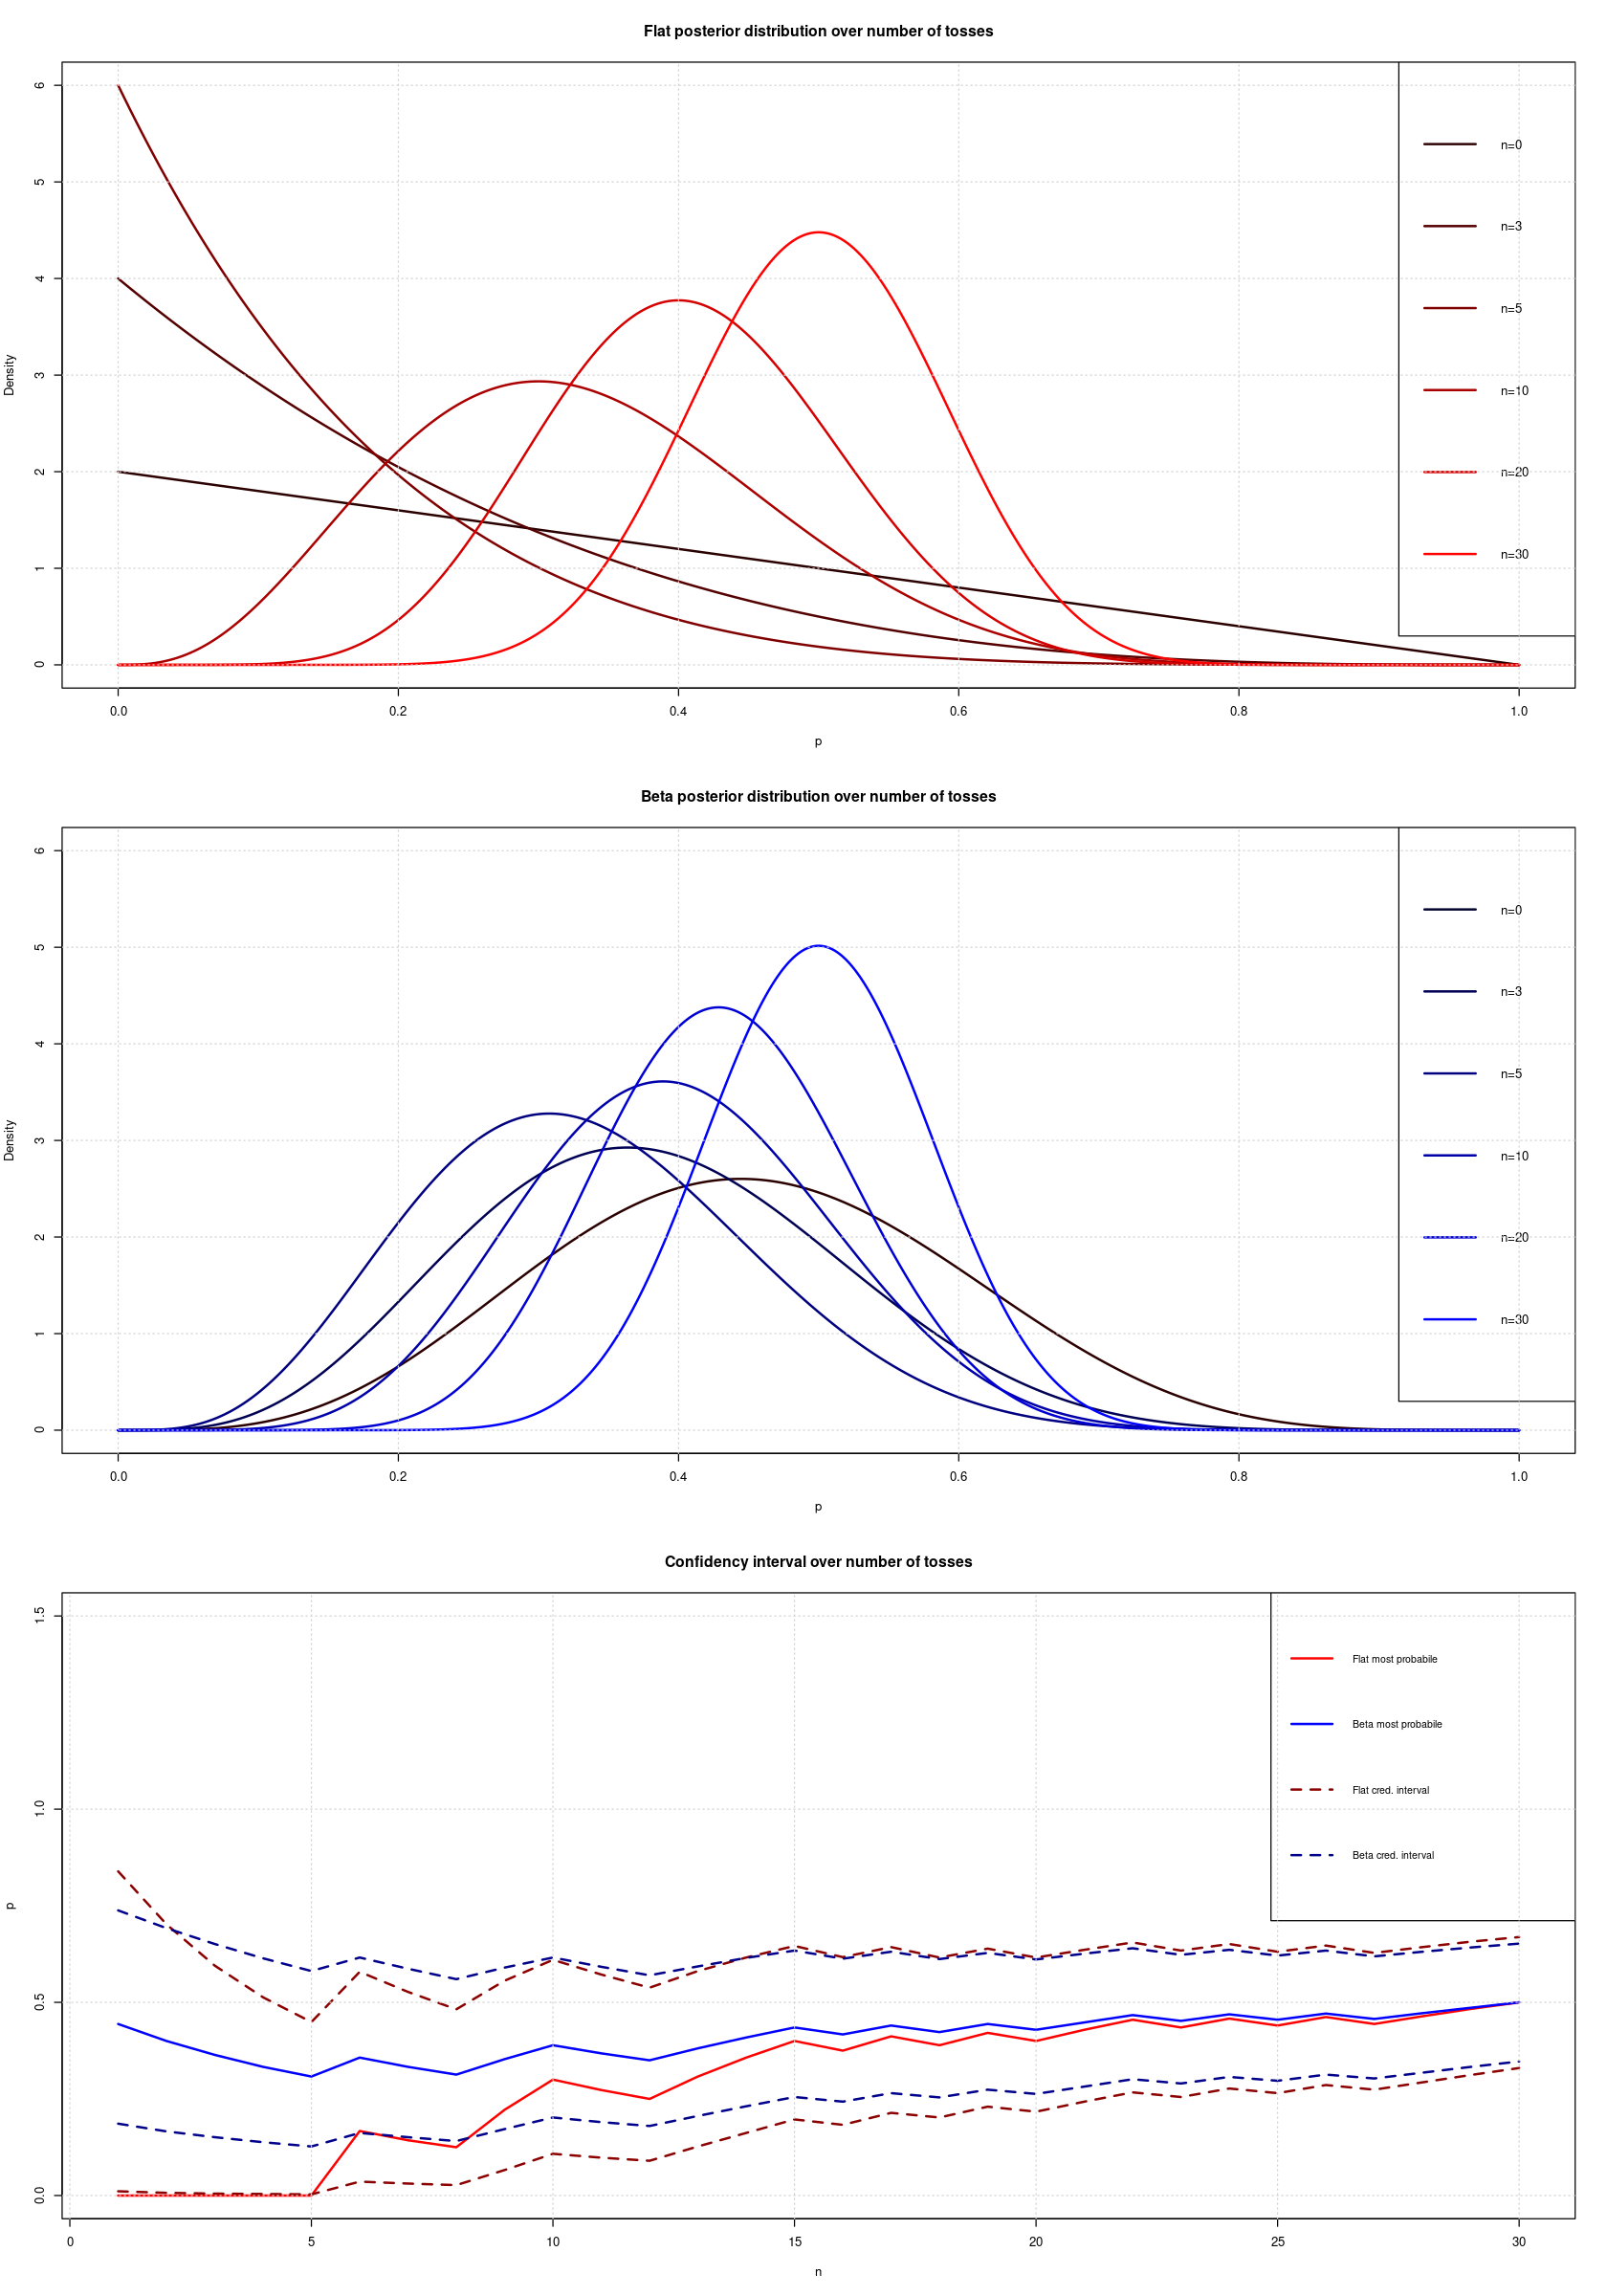

In [22]:
flat_p <- matrix(NA, nrow=n, ncol=j)
beta_p <- matrix(NA, nrow=n, ncol=j)
flat_ix <- matrix(NA, nrow=n, ncol=3)
beta_ix <- matrix(NA, nrow=n, ncol=3)

out.i <- out[1]
y.i   <- length(out.i[out.i=='H'])
    
flat_p[1,] <- dbinom(x=y.i, size=1, prob=p) * flat_prior
beta_p[1,] <- dbinom(x=y.i, size=1, prob=p) * beta_prior

flat_p[1,] <- flat_p[1,] / (dp*sum(flat_p[1,2:j]+flat_p[1,1:(j-1)])/2)
beta_p[1,] <- beta_p[1,] / (dp*sum(beta_p[1,2:j]+beta_p[1,1:(j-1)])/2)
    
flat_ix[1,2] <- p[which.max(flat_p[1,])]
beta_ix[1,2] <- p[which.max(beta_p[1,])]
flat_ix[1,c(1,3)] <- credibility(flat_p[1,]*dp,0.95)
beta_ix[1,c(1,3)] <- credibility(beta_p[1,]*dp,0.95)

for (i in 2:n){
    out.i <- out[1:i]
    y.i   <- length(out.i[out.i=='H'])
    
    flat_p[i,] <- dbinom(x=y.i, size=i, prob=p) * flat_prior
    beta_p[i,] <- dbinom(x=y.i, size=i, prob=p) * beta_prior

    flat_p[i,] <- flat_p[i,] / (dp*sum(flat_p[i,2:j]+flat_p[i,1:(j-1)])/2)
    beta_p[i,] <- beta_p[i,] / (dp*sum(beta_p[i,2:j]+beta_p[i,1:(j-1)])/2)
    
    flat_ix[i,2] <- p[which.max(flat_p[i,])]
    beta_ix[i,2] <- p[which.max(beta_p[i,])]
    flat_ix[i,c(1,3)] <- credibility(flat_p[i,]*dp,0.95)
    beta_ix[i,c(1,3)] <- credibility(beta_p[i,]*dp,0.95)
    
}

par(mfrow=c(3,1))
options(repr.plot.width=14, repr.plot.height=20)

z <- 1 
plot(p, flat_p[1,], type='l', lty=1, lwd=2, main='Flat posterior distribution over number of tosses',
     ylab='Density', xlab='p', col=rgb(red=z/6, blue=0, green=0), ylim=c(0,max(flat_p)))
for (i in c(3,5,10,20,30)){
    z <- z+1
    lines(p, flat_p[i,], lty=1, lwd=2,col=rgb(red=z/6, blue=0, green=0))
}
legend('topright', lty=1, lwd=2, col=c(rgb(red=1/6, blue=0, green=0),
                               rgb(red=2/6, blue=0, green=0),
                               rgb(red=3/6, blue=0, green=0),
                               rgb(red=4/6, blue=0, green=0),
                               rgb(red=5/6, blue=0, green=0),
                               rgb(red=1, blue=0, green=0)),legend=c('n=0',
                                                                    'n=3',
                                                                    'n=5',
                                                                    'n=10',
                                                                    'n=20',
                                                                    'n=30'))
grid()

z <- 1 
plot(p, beta_p[1,], type='l', lty=1, lwd=2, main='Beta posterior distribution over number of tosses',
     ylab='Density', xlab='p', col=rgb(red=z/6, blue=0, green=0), ylim=c(0,max(flat_p)))
for (i in c(3,5,10,20,30)){
    z <- z+1
    lines(p, beta_p[i,], lty=1, lwd=2,col=rgb(red=0, blue=z/6, green=0))
}
legend('topright', lty=1, lwd=2, col=c(rgb(red=0, blue=1/6, green=0),
                               rgb(red=0, blue=2/6, green=0),
                               rgb(red=0, blue=3/6, green=0),
                               rgb(red=0, blue=4/6, green=0),
                               rgb(red=0, blue=5/6, green=0),
                               rgb(red=0, blue=1, green=0)),legend=c('n=0',
                                                                    'n=3',
                                                                    'n=5',
                                                                    'n=10',
                                                                    'n=20',
                                                                    'n=30'))
grid()

plot(flat_ix[,2], type='l', lty=1, lwd=2, main='Confidency interval over number of tosses',
     ylab='p', xlab='n', col='red', ylim=c(0,1.5))
lines(p[flat_ix[,1]], lty=2, lwd=2,col='darkred')
lines(p[flat_ix[,3]], lty=2, lwd=2,col='darkred')

lines(beta_ix[,2], lty=1, lwd=2,col='blue')
lines(p[beta_ix[,1]], lty=2, lwd=2,col='darkblue')
lines(p[beta_ix[,3]], lty=2, lwd=2,col='darkblue')
legend('topright', legend=c('Flat most probabile','Beta most probabile',
                            'Flat cred. interval','Beta cred. interval'), 
       lty=c(1,1,2,2), lwd=2, col=c('red','blue','darkred','darkblue'), cex=0.8)
grid()

#### 3.d)

We obtained the same result with the two method. Indeed the computation to obtain the result for n=30 is exactly the same for both methods.